# Recomending Best Location for a Gym/Sport Items Store

## Importing BeautifulSoup, requests and pandas libraries

In [1]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import numpy as np

## Defining data source webpage from wikipedia

##### Using Miami as example and using neighborhoods data to search for gyms in Miami

In [2]:
url='https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami'

## Using requests to get web page text and beautifulsoup to format it to html

In [3]:
data  = requests.get(url).text 
soup = BeautifulSoup(data,'html5lib')

## Extracting tables from the soup

In [4]:
table=soup.find('table')
Lat = table.findAll('td')[5].text.split('/')[2].split('\n')[0].split(';')[0]

## Extracting Neighborhood data and creating DataFrame

In [5]:
table_contents=[]                          # Blank list to contain table data
pd.set_option('max_colwidth', 600)
for row in table.findAll('tr'):            ## iterating between all normal table cells - tag 'td'
    cell = {}                              ## creating blank dictionary which will contain each row data
    if  row.findAll('td') == []:           ## ignoring blank rows'
        pass
    else:
        cell['Neighborhood'] = row.findAll('td')[0].text   #extracting Neighborhood name
        cell['Demonym'] = row.findAll('td')[1].text
        cell['Pop 2010'] = row.findAll('td')[2].text 
        cell['Pop/km2'] = row.findAll('td')[3].text 
        if  len(row.findAll('td')[5].text.split('/')) == 1:           ## ignoring blank rows
            pass
        else:
            cell['Lat'] = row.findAll('td')[5].text.split('/')[2].split('\n')[0].split(';')[0]
            cell['Lon'] = row.findAll('td')[5].text.split('/')[2].split('\n')[0].split(';')[1]
        table_contents.append(cell)  #adding the dictionary to table contents
        

df=pd.DataFrame(table_contents)
df= df.replace('-', np.nan)
df= df.replace('N/A', np.nan)
df.dropna(inplace=True)
df['Pop/km2'] = df['Pop/km2'].str.replace(',' , '').astype(float)
df.at[7, 'Pop 2010'] = '71,000' 
df['Pop 2010'] = df['Pop 2010'].str.replace(',' , '').astype(float)
df.sort_values(by=['Pop/km2'], ascending=False, inplace=True)
df['Area Km2'] = df['Pop 2010']/df['Pop/km2']
df

,Neighborhood,Demonym,Pop 2010,Pop/km2,Lat,Lon,Area Km2
2,Brickell,Brickellite,31759.0,14541.0,25.758,-80.193,2.184100
7,Downtown,Downtowner,71000.0,10613.0,25.774,-80.193,6.689909
14,Little Havana,,76163.0,8423.0,25.773,-80.215,9.042265
1,Arts & Entertainment District,,11033.0,7948.0,25.799,-80.190,1.388148
8,Edgewater,,15005.0,6675.0,25.802,-80.190,2.247940
9,Flagami,,50834.0,5665.0,25.762,-80.316,8.973345
19,The Roads,,7327.0,4899.0,25.756,-80.207,1.495611
5,Coral Way,,35062.0,4496.0,25.750,-80.283,7.798488
23,West Flagler,,31407.0,4428.0,25.775,-80.243,7.092818
0,Allapattah,,54289.0,4401.0,25.815,-80.224,12.335606


## Number of rows in the dataframe

In [6]:
print('The number of rows in the dataframe is: {}'.format(df.shape[0]))

The number of rows in the dataframe is: 21


In [7]:
print('The total studied area in Km2 is: {}'.format(df['Area Km2'].sum()))

The total studied area in Km2 is: 97.21792475009559


## Foursquare Credentials

In [1]:
CLIENT_ID = 'NXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXX' # your Foursquare Secret
ACCESS_TOKEN = 'XXXXXX' # your FourSquare Access Token
VERSION = 'XXXX'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NXXXXXXX
CLIENT_SECRET:XXXXXXX


## Finding Gyms within 1000m radius from each Neighborhood center

In [9]:
LIMIT = 100
RADIUS = 1000
search_query= 'gym'

## Loop: Define url get json file and convert to dataframe

In [10]:
## Define blank dataframe to contain all venues
col = ['name', 'categories', 'address', 'lat', 'lng', 'labeledLatLngs',
       'distance', 'postalCode', 'cc', 'city', 'state', 'country',
       'formattedAddress', 'crossStreet', 'id']
rdf = pd.DataFrame(columns = col)
rdf

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id


In [11]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


for i,rows in df.iterrows():
    lat = float(rows['Lat'])
    lon = float(rows['Lon'])
    
    #getting gyms on each Neighborhood
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, search_query, RADIUS, LIMIT)
    results = requests.get(url).json() ## get data from foursquare
    venues = results['response']['venues']

    ## Process json file to dataframe
    # tranforming json file into a pandas dataframe library
    from pandas import json_normalize
    dataframe = json_normalize(venues) # flatten JSON

    if dataframe.shape[0] < 2:
        pass
    else:
        #filter columns
        filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
        dataframe_filtered = dataframe.loc[:, filtered_columns]


        # filter the category for each row
        dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

        # clean columns
        dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

#Store all results in the rdf dataframe
    rdf = rdf.append(dataframe_filtered)

pd.set_option("display.max_rows", None, "display.max_columns", None)    
rdf.shape

(342, 16)

## Gym venues

In [12]:
rdf.reset_index(inplace=True)
rdf.drop('index', axis='columns', inplace=True)
remove_list=['Housing Development', 
             'School',
             'Club House',
             'Pool',
             'Hospital',
             'Residential Building (Apartment / Condo)',
             'General Entertainment',
             'Hotel',
             'Other Great Outdoors',
             'Building',
             'Neighborhood',
             'Business Center',
             'Basketball Stadium',
             'Spa']
rdf_filter=rdf[~rdf['categories'].isin(remove_list)]


rdf_filter.shape


(280, 16)

### Removing Duplicates

In [13]:
rdf_filter = rdf_filter.drop_duplicates(subset='name')
rdf_filter.reset_index(inplace=True)
rdf_filter.drop('index', axis='columns', inplace=True)
rdf_filter

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id,neighborhood
0,Gym at The Palace,Gym,1541 Brickell Ave,25.756702,-80.192520,"[{'label': 'entrance', 'lat': 25.756644, 'lng': -80.192497}, {'label': 'display', 'lat': 25.756702423095703, 'lng': -80.19252014160156}]",152,33129,US,Miami,FL,United States,"[1541 Brickell Ave, Miami, FL 33129, United States]",NaN,4e107722d1647a0fff77f151,NaN
1,The Gym,Gym,The Imperial at Brickell,25.755522,-80.194013,"[{'label': 'display', 'lat': 25.755522095440746, 'lng': -80.19401334308027}]",293,33129,US,Miami,FL,United States,"[The Imperial at Brickell, Miami, FL 33129, United States]",NaN,4f0c9929e4b0553e20667d93,NaN
2,Gym at Brickell 1st,Gym / Fitness Center,NaN,25.761702,-80.195755,"[{'label': 'display', 'lat': 25.761702, 'lng': -80.195755}]",496,33130,US,Miami,FL,United States,"[Miami, FL 33130, United States]",NaN,5a8f0ec2588e362fef64e03e,NaN
3,The Gym @ 500 Brickell,Gym,500 Brickell Ave,25.767671,-80.191400,"[{'label': 'display', 'lat': 25.767670849961764, 'lng': -80.19139959216115}]",1088,33131,US,Miami,FL,United States,"[500 Brickell Ave, Miami, FL 33131, United States]",NaN,4c4cd5687711e21e75e85fa0,NaN
4,Gym at Brickell East,Gym,NaN,25.757697,-80.192052,"[{'label': 'display', 'lat': 25.757697, 'lng': -80.192052}]",100,NaN,US,Miami,FL,United States,"[Miami, FL, United States]",NaN,521b34c111d2a62f0ba49769,NaN
5,The Club At Brickell Bay Gym,Gym,1200 Brickell Bay Dr,25.761902,-80.189969,"[{'label': 'display', 'lat': 25.761901951906516, 'lng': -80.1899689247625}]",530,33131,US,Miami,FL,United States,"[1200 Brickell Bay Dr, Miami, FL 33131, United States]",NaN,4c5f51c554ac0f475c47b321,NaN
6,The Gym @ 1450 Brickell Avenue,Gym,1450 Brickell Ave,25.758772,-80.192961,"[{'label': 'display', 'lat': 25.7587724298218, 'lng': -80.19296126652738}]",86,33131,US,Miami,FL,United States,"[1450 Brickell Ave, Miami, FL 33131, United States]",NaN,4e44021ed22de4060ef014e2,NaN
7,Gym @ Soma Brickell,Gym,NaN,25.761821,-80.196706,"[{'label': 'display', 'lat': 25.761821, 'lng': -80.196706}]",564,33130,US,Miami,FL,United States,"[Miami, FL 33130, United States]",NaN,5b94092bb6b04b002cec53d4,NaN
8,Gym,Gym / Fitness Center,NaN,25.763015,-80.190474,"[{'label': 'display', 'lat': 25.763015, 'lng': -80.190474}]",613,33131,US,Miami,FL,United States,"[Miami, FL 33131, United States]",NaN,5d6f8e54bbb04e0007810e33,NaN
9,Gym At Fortune House Hotel,Gym,NaN,25.759224,-80.191313,"[{'label': 'display', 'lat': 25.759224, 'lng': -80.191313}]",217,NaN,US,Miami,FL,United States,"[Miami, FL, United States]",NaN,51fb3a98498edda1d6223839,NaN


In [14]:
print('The number of rows in the dataframe is: {}'.format(rdf_filter.shape[0]))

The number of rows in the dataframe is: 129


## Visualizing in a map

In [15]:
import folium # plotting library

venues_map = folium.Map(location=[float(df.Lat[0]), float(df.Lon[0])], zoom_start=11) # generate map centred around Bourough

data_plot=rdf_filter

# add popular spots to the map as blue circle markers
for lat, lng, lab in zip(data_plot.lat, data_plot.lng, data_plot.name):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup= folium.Popup(lab, parse_html=True),
        #fill=True,
        color='red',
        #fill_color='blue',
        #fill_opacity=0.001
        ).add_to(venues_map)

    
# Loop starts selecting coordinates for each Borough
for lat, long, label in zip(df.Lat, df.Lon, df.Neighborhood):
                            
#i,rows in Nhoods.iterrows():
#    lat = rows['Latitude']
#    lon = rows['Longitude']
#    Nhd = rows['Neighborhood']
    
# add Neighborhood center as a red circle mark
    folium.CircleMarker(
        [float(lat), float(long)],
        radius=2,
        #fill=True,
        color='black',
        fill_color='black',
        fill_opacity=0.6
        ).add_to(venues_map)
    
# display map
venues_map


## Population Density Bubble map

In [16]:
import folium # plotting library

venues_map = folium.Map(location=[float(df.Lat[0]), float(df.Lon[0])], zoom_start=11) # generate map centred around Bourough

data_plot=rdf_filter


# Loop starts selecting coordinates for each Borough
for lat, long, label, pop in zip(df.Lat, df.Lon, df.Neighborhood, df['Pop/km2']):
                         
 
# add Neighborhood center as a red circle mark
    folium.CircleMarker(
        [float(lat), float(long)],
        #radius=5,
        radius=float(pop)/1000,
        fill=True,
        color='blue',
        fill_color='red',
        fill_opacity=0.5
        ).add_to(venues_map)

# display map
venues_map


In [17]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans

## First K_means first realization: 10 clusters
### Defining data set

In [441]:
X = rdf_filter[['lat','lng']]

## Initializing K_means object

In [456]:
n = 10
k_means = KMeans(init='k-means++', n_clusters=n, n_init=15)

#### Kmeans fitting

In [457]:
k_means.fit(X)

KMeans(n_clusters=10, n_init=15)

### Obtaining Kmeans cluster centers [best locations for store]

In [458]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers
cluster_centers = pd.DataFrame(k_means_cluster_centers, columns=['lat', 'lon'])
cluster_centers.index.name='label'
cluster_centers

,lat,lon
label,,
0,25.767433,-80.239852
1,25.771859,-80.189414
2,25.804880,-80.189096
3,25.748887,-80.286843
4,25.760192,-80.193646
5,25.790326,-80.187685
6,25.712697,-80.252803
7,25.784464,-80.261455
8,25.830750,-80.184725


### Obtaining Kmeans labels [how many gyms for each center]

In [459]:
k_means_labels = k_means.labels_
k_means_labels

array([4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 1, 4, 4, 4, 4, 4, 1, 1, 9, 1,
       1, 1, 1, 1, 1, 1, 1, 9, 9, 1, 9, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1,
       9, 9, 9, 9, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 5, 5, 5, 5, 5, 2, 2, 5, 2, 2, 4, 4, 3, 3, 3, 0, 0, 7,
       7, 7, 8, 8, 8, 9, 5, 5, 5, 5, 5, 5, 5, 2, 2, 6, 6, 8, 8])

In [460]:
labels=pd.DataFrame(k_means_labels)
freq = pd.DataFrame(labels[0].value_counts())
freq.index.name='label'
freq.columns=['freq']
freq.sort_index()

,freq
label,
0,2
1,23
2,20
3,3
4,38
5,21
6,2
7,3
8,5


## Calculating Mean Store Distance to Center

In [461]:
X_labelled = pd.concat ([X, pd.DataFrame(k_means_labels, columns=['labels']) ],axis=1)

mean=[]
for la, (cx, cy) in cluster_centers.iterrows():
    Xf = X_labelled[X_labelled['labels']==la]
    #print(la, cx, cy)
    distances=[]
    for i,(x,y,la) in Xf.iterrows():
        distances.append(np.sqrt((x-cx)**2 + (y-cy)**2)*111000)
    #print(distances)
    mean.append(np.mean(distances))
        
mean = pd.DataFrame(data=mean, columns=['mean dist'])
mean.index.name='label'
mean

,mean dist
label,
0,439.427870
1,442.871749
2,567.217871
3,517.500625
4,498.612930
5,429.982694
6,755.368702
7,240.324187
8,572.800427


## Getting the Two Best Locations

In [462]:
#initializing variables
d=[]
store_locations=[]

#joining cluster centers, number of nearby stores and mean distance
store_locations= pd.concat([cluster_centers, freq, mean], axis=1)

#Calculating density metric as number of stores divided by mean distance and adding to store_locations dataframe
for lab, (la, lo, f, m) in store_locations.iterrows():
    d.append(f/m)
d=pd.DataFrame(d, columns=['Stores/MeanDist'])
store_locations=pd.concat([store_locations, d], axis=1)

#Sorting by density and selecting the best 2 locations
store_locations.sort_values('Stores/MeanDist', ascending=False, inplace=True)
best_2_locations = store_locations.head(2)
ranking = ['best place', 'second best']
best_2_locations = best_2_locations.assign(ranking = ranking)
#best_2_locations.reset_index()

store_locations

,lat,lon,freq,mean dist,Stores/MeanDist
4,25.760192,-80.193646,38,498.612930,0.076211
1,25.771859,-80.189414,23,442.871749,0.051934
5,25.790326,-80.187685,21,429.982694,0.048839
2,25.804880,-80.189096,20,567.217871,0.035260
9,25.773780,-80.200393,12,750.266047,0.015994
7,25.784464,-80.261455,3,240.324187,0.012483
8,25.830750,-80.184725,5,572.800427,0.008729
3,25.748887,-80.286843,3,517.500625,0.005797
0,25.767433,-80.239852,2,439.427870,0.004551
6,25.712697,-80.252803,2,755.368702,0.002648


In [463]:
best_2_locations

,lat,lon,freq,mean dist,Stores/MeanDist,ranking
4,25.760192,-80.193646,38,498.612930,0.076211,best place
1,25.771859,-80.189414,23,442.871749,0.051934,second best


## Best Two Locations in Map - 10 Clusters

In [464]:
venues_map = folium.Map(location=[float(df.Lat[0]), float(df.Lon[0])], tiles='Stamen Toner', zoom_start=12) # generate map centred around Bourough

data_plot=rdf_filter

# Plotting all gym locations =
for lat, lng, lab in zip(data_plot.lat, data_plot.lng, data_plot.name):
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup= folium.Popup(lab, parse_html=True),
        #fill=True,
        color='#3186cc',
        #fill_color='blue',
        #fill_opacity=1
        ).add_to(venues_map)


# Loop starts selecting coordinates for each Borough
for lat, long, rank in zip(best_2_locations['lat'], best_2_locations['lon'], best_2_locations['ranking']):
                            
#i,rows in Nhoods.iterrows():
#    lat = rows['Latitude']
#    lon = rows['Longitude']
#    Nhd = rows['Neighborhood']
    
# add best locations for store in the cluster center as a red circle mark
    folium.CircleMarker(
        [float(lat), float(long)],
        radius=4,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6,
        popup= folium.Popup(rank, parse_html=True),
        ).add_to(venues_map)

# display map
venues_map


### Loop to estimate cluster centers for 5 to 19 clusters

In [502]:
# Empty Variable
all_best_2_centers = pd.DataFrame(columns = ['lat', 'lon', 'freq', 'ranking', 'clusters'])

for n in range(5,20):
    # Initializing Kmeans
    k_means = KMeans(init='k-means++', n_clusters=n, n_init=15)
    k_means.fit(X)
    # Generating series with label, lat, lon for cluster centers 
    k_means_cluster_centers = k_means.cluster_centers_
    cluster_centers = pd.DataFrame(k_means_cluster_centers, columns=['lat', 'lon'])
    cluster_centers.index.name='label'
    
    # Generating series frequency of each cluster (how many gyms corresponds to each cluster)
    k_means_labels = k_means.labels_
    labels=pd.DataFrame(k_means_labels)
    freq = pd.DataFrame(labels[0].value_counts())
    freq.index.name='label'
    freq.columns=['freq']
    
    # Calculating Mean Store Distance to Center
    X_labelled = pd.concat ([X, pd.DataFrame(k_means_labels, columns=['labels']) ],axis=1)
    mean=[]
    for la, (cx, cy) in cluster_centers.iterrows():
        Xf = X_labelled[X_labelled['labels']==la]
        distances=[]
        for i,(x,y,la) in Xf.iterrows():
            distances.append(np.sqrt((x-cx)**2 + (y-cy)**2)*111000)
        mean.append(np.mean(distances))     
    mean = pd.DataFrame(data=mean, columns=['mean dist'])
    mean.index.name='label'


    #initializing variables
    d=[]
    store_locations=[]

    #joining cluster centers, number of nearby stores and mean distance
    store_locations= pd.concat([cluster_centers, freq, mean], axis=1)

    #Calculating density metric as number of stores divided by mean distance and adding to store_locations dataframe
    for lab, (la, lo, f, m) in store_locations.iterrows():
        d.append(f/m)
    d=pd.DataFrame(d, columns=['Stores/MeanDist'])
    store_locations=pd.concat([store_locations, d], axis=1)

    #Sorting by density and selecting the best 2 locations
    store_locations.sort_values('Stores/MeanDist', ascending=False, inplace=True)
    best_2_locations = store_locations.head(2)
    ranking = ['best place', 'second best']
    best_2_locations = best_2_locations.assign(ranking = ranking)
    cluster_n = [n, n]
    best_2_locations = best_2_locations.assign(ranking = ranking)
    best_2_locations = best_2_locations.assign(clusters = cluster_n)
    all_best_2_centers = pd.concat([all_best_2_centers , best_2_locations])
               
all_best_2_centers.reset_index()

,index,lat,lon,freq,ranking,clusters,mean dist,Stores/MeanDist
0,1,25.765856,-80.193209,72,best place,5,835.832327,0.086142
1,3,25.793404,-80.188457,32,second best,5,663.467127,0.048231
2,0,25.765856,-80.193209,72,best place,6,835.832327,0.086142
3,3,25.793404,-80.188457,32,second best,6,663.467127,0.048231
4,5,25.761167,-80.193825,44,best place,7,570.804264,0.077084
5,3,25.799538,-80.188262,35,second best,7,744.906910,0.046986
6,0,25.760326,-80.193431,39,best place,8,509.428069,0.076556
7,7,25.790326,-80.187685,21,second best,8,429.982694,0.048839
8,7,25.760070,-80.193783,37,best place,9,495.195976,0.074718
9,2,25.771280,-80.190189,27,second best,9,497.247009,0.054299


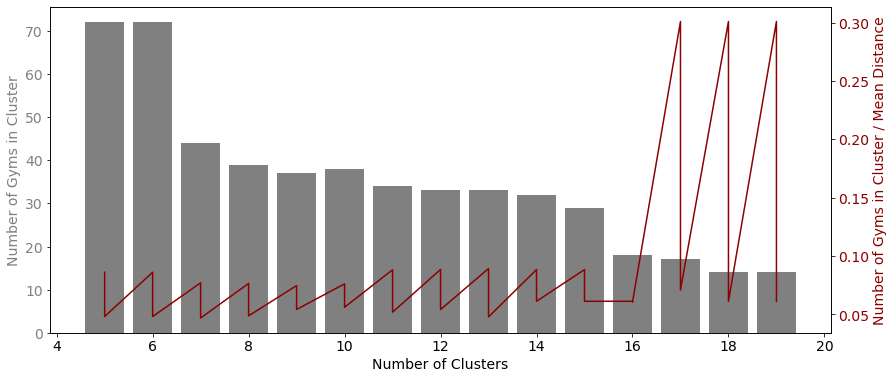

In [503]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

fig, ax1 = plt.subplots(figsize=(14,6))

c='gray'
ax1.bar(all_best_2_centers['clusters'], all_best_2_centers['freq'], color=c)
ax1.set_ylabel('Number of Gyms in Cluster', color=c)
ax1.tick_params(axis='y', labelcolor=c)
ax1.set_xlabel('Number of Clusters')

c='darkred'
ax2=ax1.twinx()
ax2.plot(all_best_2_centers['clusters'], all_best_2_centers['Stores/MeanDist'], color=c)
ax2.set_ylabel('Number of Gyms in Cluster / Mean Distance', color=c)
ax2.tick_params(axis='y', labelcolor=c)



### Loop to estimate cluster centers for 11 to 15 clusters

In [504]:
# Empty Variable
all_best_2_centers = pd.DataFrame(columns = ['lat', 'lon', 'freq', 'ranking', 'clusters'])

for n in range(11,16):
    # Initializing Kmeans
    k_means = KMeans(init='k-means++', n_clusters=n, n_init=15)
    k_means.fit(X)
    # Generating series with label, lat, lon for cluster centers 
    k_means_cluster_centers = k_means.cluster_centers_
    cluster_centers = pd.DataFrame(k_means_cluster_centers, columns=['lat', 'lon'])
    cluster_centers.index.name='label'
    
    # Generating series frequency of each cluster (how many gyms corresponds to each cluster)
    k_means_labels = k_means.labels_
    labels=pd.DataFrame(k_means_labels)
    freq = pd.DataFrame(labels[0].value_counts())
    freq.index.name='label'
    freq.columns=['freq']
    
    # Calculating Mean Store Distance to Center
    X_labelled = pd.concat ([X, pd.DataFrame(k_means_labels, columns=['labels']) ],axis=1)
    mean=[]
    for la, (cx, cy) in cluster_centers.iterrows():
        Xf = X_labelled[X_labelled['labels']==la]
        distances=[]
        for i,(x,y,la) in Xf.iterrows():
            distances.append(np.sqrt((x-cx)**2 + (y-cy)**2)*111000)
        mean.append(np.mean(distances))     
    mean = pd.DataFrame(data=mean, columns=['mean dist'])
    mean.index.name='label'


    #initializing variables
    d=[]
    store_locations=[]

    #joining cluster centers, number of nearby stores and mean distance
    store_locations= pd.concat([cluster_centers, freq, mean], axis=1)

    #Calculating density metric as number of stores divided by mean distance and adding to store_locations dataframe
    for lab, (la, lo, f, m) in store_locations.iterrows():
        d.append(f/m)
    d=pd.DataFrame(d, columns=['Stores/MeanDist'])
    store_locations=pd.concat([store_locations, d], axis=1)

    #Sorting by density and selecting the best 2 locations
    store_locations.sort_values('Stores/MeanDist', ascending=False, inplace=True)
    best_2_locations = store_locations.head(2)
    ranking = ['best place', 'second best']
    best_2_locations = best_2_locations.assign(ranking = ranking)
    cluster_n = [n, n]
    best_2_locations = best_2_locations.assign(ranking = ranking)
    best_2_locations = best_2_locations.assign(clusters = cluster_n)
    all_best_2_centers = pd.concat([all_best_2_centers , best_2_locations])    
  
all_best_2_centers.reset_index()

,index,lat,lon,freq,ranking,clusters,mean dist,Stores/MeanDist
0,1,25.762782,-80.192333,34,best place,11,385.300849,0.088243
1,6,25.773078,-80.191216,26,second best,11,510.217726,0.050959
2,2,25.762782,-80.192333,34,best place,12,385.300849,0.088243
3,7,25.772862,-80.190935,25,second best,12,487.373671,0.051295
4,9,25.762451,-80.192060,32,best place,13,361.889768,0.088425
5,8,25.773155,-80.188762,17,second best,13,357.705683,0.047525
6,3,25.761930,-80.191909,30,best place,14,358.357583,0.083715
7,1,25.792801,-80.187289,14,second best,14,228.430850,0.061288
8,0,25.762896,-80.194275,17,best place,15,239.694221,0.070924
9,11,25.759500,-80.191223,15,second best,15,287.514185,0.052171


### Plot Results in Map

In [505]:
venues_map = folium.Map(location=[float(df.Lat[0]), float(df.Lon[0])], tiles='Stamen Toner', zoom_start=12) # generate map centred around Bourough

data_plot=rdf_filter

# Plotting all gym locations =
for lat, lng, lab in zip(data_plot.lat, data_plot.lng, data_plot.name):
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup= folium.Popup(lab, parse_html=True),
        #fill=True,
        color='#3186cc',
        #fill_color='blue',
        #fill_opacity=1
        ).add_to(venues_map)


# Loop starts selecting coordinates for each Borough
for lat, long, c in zip(all_best_2_centers['lat'], all_best_2_centers['lon'], all_best_2_centers['clusters']):
                            
#i,rows in Nhoods.iterrows():
#    lat = rows['Latitude']
#    lon = rows['Longitude']
#    Nhd = rows['Neighborhood']
    
# add best locations for store in the cluster center as a red circle mark
    folium.CircleMarker(
        [float(lat), float(long)],
        radius=c/2,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6,
        popup= folium.Popup(str(c), parse_html=True),
        ).add_to(venues_map)

# display map
venues_map

# Observations:
#### Most of the iterations (3) agreed that the best location for our branch is between the Southeast 1st Avenue and the Brickell Avenue and the Southwest 14th Street and the Southeast 10th Street.